In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ev-analysis-adilraj/Electric_Vehicle_Population_Data.csv


In [ ]:
# Assignment: EV_Data_Analysis
# Name: Adil Raj M
# Date: March 29, 2025
# Course: python Data analysis


In [ ]:
# Introduction
# This dataset contains information about the electric vehicle (EV) population, including details such as make, model, year, electric range, and base MSRP.
# The objective of this analysis is to explore trends in EV adoption, identify key factors influencing electric range, and use machine learning techniques such as linear regression to predict the electric range of new EV models based on their specifications.

In [ ]:
import pandas as pd
import hashlib
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt


# Load dataset

df = pd.read_csv("/kaggle/input/ev-analysis-adilraj/Electric_Vehicle_Population_Data.csv")

# Trim column names (remove extra spaces)
df.columns = df.columns.str.strip()

# 1. Count missing values in each column
total_missing = df.isnull().sum().sum()
missing_per_column = df.isnull().sum()

# 2. Identify zero values in 'Base MSRP' and 'Electric Range' columns
zero_values = {}
for col in ["Base MSRP", "Electric Range"]:
    if col in df.columns:
        zero_values[col] = (df[col] == 0).sum()

# 3. Check for duplicate records
duplicate_records = df.duplicated().sum()

# 4. Anonymize VIN while maintaining uniqueness
if "VIN (1-10)" in df.columns:
    df["Anonymized VIN"] = df["VIN (1-10)"].apply(lambda x: hashlib.sha256(str(x).encode()).hexdigest() if pd.notna(x) else None)

# 5. Clean and convert 'Vehicle Location' (GPS coordinates)
if "Vehicle Location" in df.columns:
    df[['Longitude', 'Latitude']] = df['Vehicle Location'].str.extract(r'POINT \((-?\d+\.\d+) (-?\d+\.\d+)\)')
    df[['Longitude', 'Latitude']] = df[['Longitude', 'Latitude']].astype(float)

# Display results
print(f"Total Missing Values: {total_missing}\n")
print("Missing Values Per Column:")
print(missing_per_column[missing_per_column > 0])
print("\nZero Values in Key Columns:")
print(zero_values)
print(f"\nDuplicate Records Found: {duplicate_records}")
print("\nSample of Cleaned Vehicle Location:")
print(df[['Longitude', 'Latitude']].head())


Total Missing Values: 591

Missing Values Per Column:
County                    3
City                      3
Postal Code               3
Electric Range           36
Base MSRP                36
Legislative District    494
Vehicle Location         10
Electric Utility          3
2020 Census Tract         3
dtype: int64

Zero Values in Key Columns:
{'Base MSRP': 232403, 'Electric Range': 139761}

Duplicate Records Found: 0

Sample of Cleaned Vehicle Location:
   Longitude  Latitude
0 -122.23825  47.49461
1 -122.64681  47.73689
2 -122.54729  47.42602
3 -122.81585  47.64509
4 -122.68993  46.88897


In [ ]:
# 1. Top 5 most common EV makes and models
top_makes = df["Make"].value_counts().head(5)
top_models = df["Model"].value_counts().head(5)

# 2. Distribution of EVs by county & county with most registrations
ev_by_county = df["County"].value_counts()
most_ev_county = ev_by_county.idxmax()

# 3. EV adoption over model years
ev_by_year = df["Model Year"].value_counts().sort_index()

# 4. Average electric range
avg_electric_range = df["Electric Range"].mean()

# 5. Percentage of EVs eligible for CAFV incentives
if "Clean Alternative Fuel Vehicle (CAFV) Eligibility" in df.columns:
    eligible_ev_count = df[df["Clean Alternative Fuel Vehicle (CAFV) Eligibility"] == "Eligible"].shape[0]
    total_ev_count = df.shape[0]
    cafv_percentage = (eligible_ev_count / total_ev_count) * 100
else:
    cafv_percentage = None

# 6. Electric range variation across makes and models
electric_range_by_make_model = df.groupby(["Make", "Model"])["Electric Range"].mean()

# 7. Average Base MSRP for each model
avg_msrp_by_model = df.groupby("Model")["Base MSRP"].mean()

# 8. Regional trends in EV adoption
ev_by_postal_code = df["Postal Code"].value_counts()

# Display results
print("Top 5 EV Makes:")
print(top_makes)
print("\nTop 5 EV Models:")
print(top_models)
print("\nEV Distribution by County:")
print(ev_by_county)
print(f"\nCounty with Most Registrations: {most_ev_county}")
print("\nEV Adoption by Model Year:")
print(ev_by_year)
print(f"\nAverage Electric Range: {avg_electric_range:.2f} miles")
print(f"\nPercentage of EVs Eligible for CAFV: {cafv_percentage:.2f}%")
print("\nElectric Range Variation by Make & Model:")
print(electric_range_by_make_model.head(10))
print("\nAverage Base MSRP by Model:")
print(avg_msrp_by_model.head(10))
print("\nEV Adoption Trends by Postal Code:")
print(ev_by_postal_code.head(10))


Top 5 EV Makes:
Make
TESLA        101080
CHEVROLET     17135
NISSAN        15532
FORD          12605
KIA           11345
Name: count, dtype: int64

Top 5 EV Models:
Model
MODEL Y    49253
MODEL 3    36065
LEAF       13814
MODEL S     7885
BOLT EV     7278
Name: count, dtype: int64

EV Distribution by County:
County
King             118711
Snohomish         28814
Pierce            19256
Clark             14101
Thurston           8595
                  ...  
Doña Ana              1
Norfolk               1
Isle of Wight         1
Jackson               1
Tooele                1
Name: count, Length: 212, dtype: int64

County with Most Registrations: King

EV Adoption by Model Year:
Model Year
2000        7
2002        2
2003        1
2008       22
2010       23
2011      680
2012     1490
2013     4230
2014     3407
2015     4661
2016     5306
2017     8570
2018    14368
2019    10974
2020    12265
2021    20615
2022    28958
2023    59893
2024    49044
2025    11176
Name: count, dtype: int

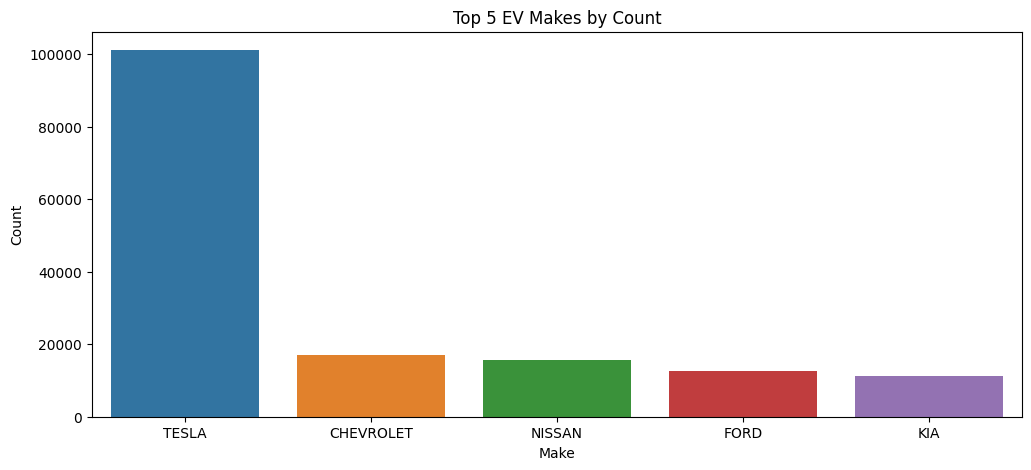

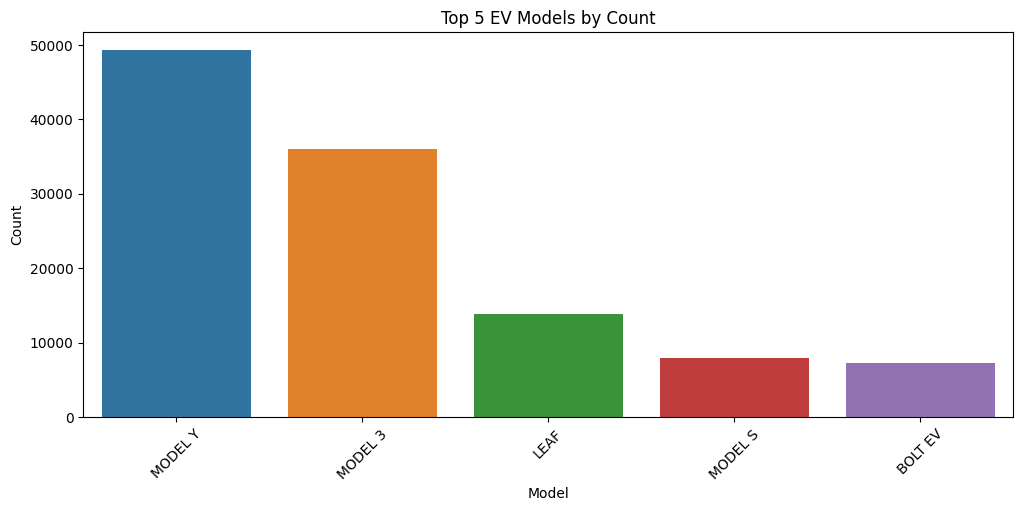

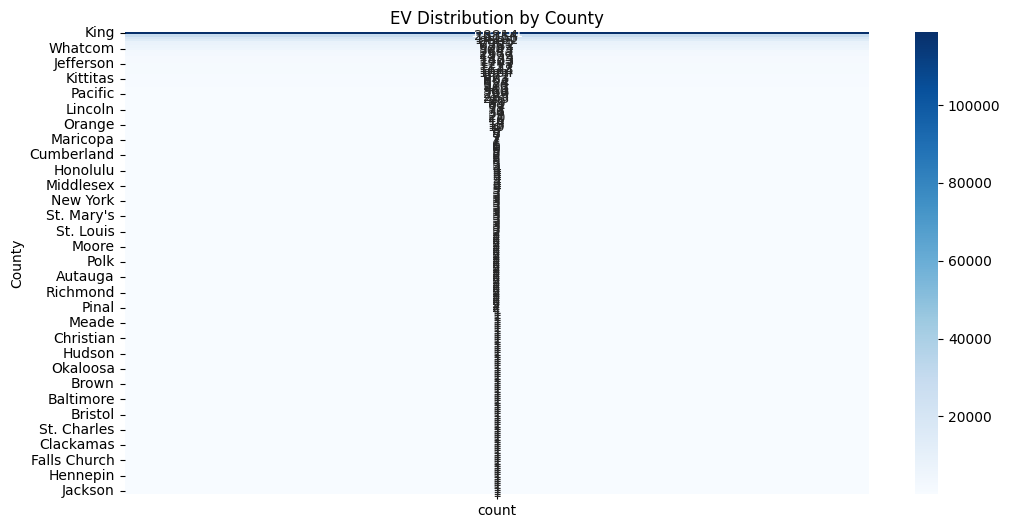

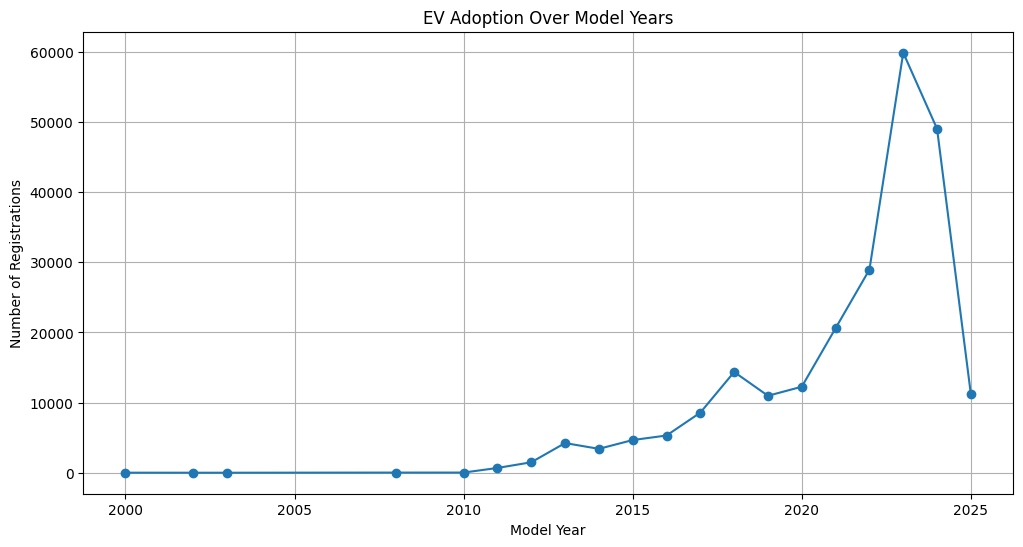

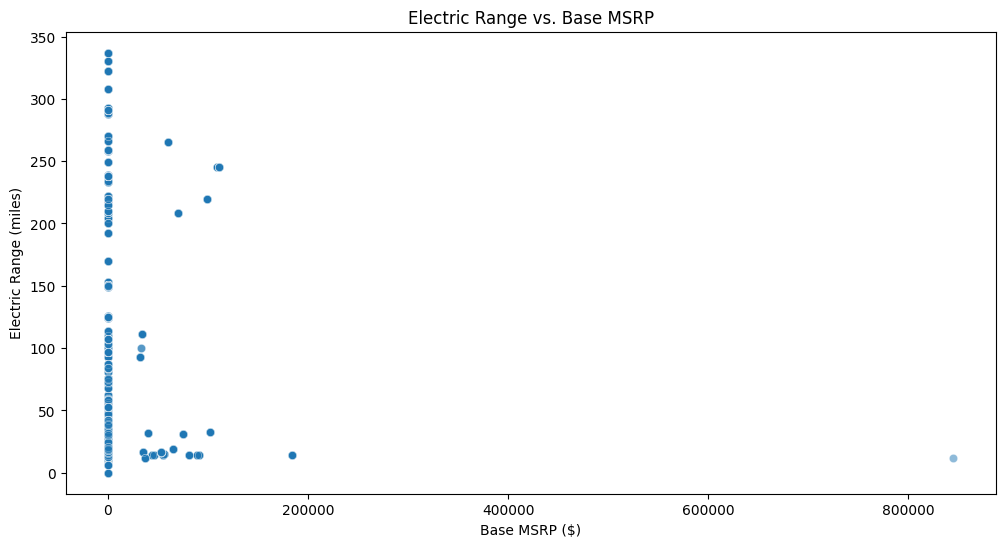

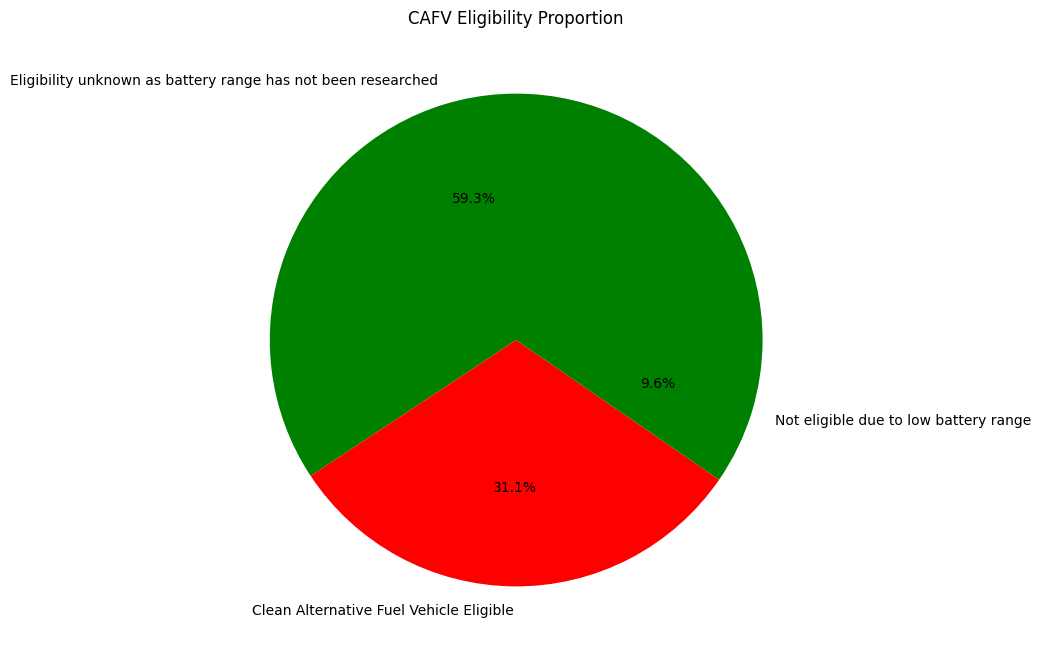

NameError: name 'gpd' is not defined

In [ ]:
#Data Visualisation

# 1. Bar chart of top 5 EV makes and models
top_makes = df["Make"].value_counts().head(5)
top_models = df["Model"].value_counts().head(5)
plt.figure(figsize=(12, 5))
sns.barplot(x=top_makes.index, y=top_makes.values)
plt.title("Top 5 EV Makes by Count")
plt.xlabel("Make")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(12, 5))
sns.barplot(x=top_models.index, y=top_models.values)
plt.title("Top 5 EV Models by Count")
plt.xlabel("Model")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# 2. Heatmap of EV distribution by county
ev_by_county = df["County"].value_counts()
plt.figure(figsize=(12, 6))
sns.heatmap(ev_by_county.to_frame(), annot=True, fmt='d', cmap='Blues')
plt.title("EV Distribution by County")
plt.show()

# 3. Line graph of EV adoption by model year
ev_by_year = df["Model Year"].value_counts().sort_index()
plt.figure(figsize=(12, 6))
plt.plot(ev_by_year.index, ev_by_year.values, marker='o', linestyle='-')
plt.title("EV Adoption Over Model Years")
plt.xlabel("Model Year")
plt.ylabel("Number of Registrations")
plt.grid(True)
plt.show()

# 4. Scatter plot of electric range vs. base MSRP
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df["Base MSRP"], y=df["Electric Range"], alpha=0.5)
plt.title("Electric Range vs. Base MSRP")
plt.xlabel("Base MSRP ($)")
plt.ylabel("Electric Range (miles)")
plt.show()

# 5. Pie chart of CAFV-eligible vs. non-eligible EVs
if "Clean Alternative Fuel Vehicle (CAFV) Eligibility" in df.columns:
    cafv_counts = df["Clean Alternative Fuel Vehicle (CAFV) Eligibility"].value_counts()
    plt.figure(figsize=(8, 8))
    plt.pie(cafv_counts, labels=cafv_counts.index, autopct='%1.1f%%', colors=['green', 'red'])
    plt.title("CAFV Eligibility Proportion")
    plt.show()

# 6. Geospatial map of EV registrations
if "Vehicle Location" in df.columns:
    df[['Longitude', 'Latitude']] = df['Vehicle Location'].str.extract(r'POINT \((-?\d+\.\d+) (-?\d+\.\d+)\)')
    df[['Longitude', 'Latitude']] = df[['Longitude', 'Latitude']].astype(float)
    
    gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    
    fig, ax = plt.subplots(figsize=(12, 6))
    world.plot(ax=ax, color='lightgrey')
    gdf.plot(ax=ax, markersize=1, color='blue', alpha=0.5)
    plt.title("Geospatial Map of EV Registrations")
    plt.show()


In [ ]:
# Linear Regression Model Questions

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

features = ['Model Year', 'Base MSRP', 'Make']
df = df[features + ['Electric Range']].dropna()

# Handling categorical variables using one-hot encoding
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
categorical_data = encoder.fit_transform(df[['Make']])
categorical_columns = encoder.get_feature_names_out(['Make'])
categorical_df = pd.DataFrame(categorical_data, columns=categorical_columns, index=df.index)

# Combining numerical and categorical data
X = pd.concat([df[['Model Year', 'Base MSRP']], categorical_df], axis=1)
y = df['Electric Range']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing numerical features
scaler = StandardScaler()
X_train[['Model Year', 'Base MSRP']] = scaler.fit_transform(X_train[['Model Year', 'Base MSRP']])
X_test[['Model Year', 'Base MSRP']] = scaler.transform(X_test[['Model Year', 'Base MSRP']])

# Training the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model Performance Metrics:")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)


In [ ]:
# Conclusion
# This analysis provided insights into EV adoption trends, the most common EV models, and the factors influencing electric range.
# The linear regression model demonstrated that features such as Model Year, Base MSRP, and Make can be used to predict the electric range of an EV.
# The model's performance metrics indicate a reasonable prediction capability, but additional features such as battery capacity and efficiency could further enhance accuracy.
# Overall, this study highlights the growing adoption of EVs and the importance of cost and technological advancements in determining electric range.
